# Explanatory Data Analysis (EDA)

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

## Dataset Load & Investigation

In [2]:
# Loading dataset
df = pd.read_csv('../Data/salary_cleaned.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,year,month,year_month,timestamp_3mos,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,state,employment_rate,employment_rate_3mos
0,2018-06-03 13:58:20,Yahoo,IC2,Software Engineer,160.5,"Sunnyvale, CA",0.58,0.58,Full Stack,2018,6,2018-06,2018-03-03 13:58:20,2018-03,CA,0.029,0.024,California,0.957660,0.956797
1,2018-06-04 20:28:22,Facebook,E3,Software Engineer,165.0,"Seattle, WA",1.00,1.00,Full Stack,2018,6,2018-06,2018-03-04 20:28:22,2018-03,WA,0.029,0.024,Washington,0.955998,0.954978
2,2018-06-05 00:56:33,VmWare,Senior MTS,Software Engineer,218.0,"Palo Alto, CA",8.00,1.00,Distributed Systems (Back-End),2018,6,2018-06,2018-03-05 00:56:33,2018-03,CA,0.029,0.024,California,0.957660,0.956797
3,2018-06-05 01:19:05,Uber,L4,Software Engineer,240.0,"San Francisco, CA",3.00,0.00,Web Development (Front-End),2018,6,2018-06,2018-03-05 01:19:05,2018-03,CA,0.029,0.024,California,0.957660,0.956797
4,2018-06-05 07:13:17,Capital One,Master Software Engineer,Software Engineer,196.0,"New York, NY",8.00,2.00,iOS,2018,6,2018-06,2018-03-05 07:13:17,2018-03,NY,0.029,0.024,New York,0.959053,0.955962


In [3]:
df.shape

(24496, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24496 entries, 0 to 24495
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                24496 non-null  object 
 1   company                  24496 non-null  object 
 2   level                    24496 non-null  object 
 3   title                    24496 non-null  object 
 4   totalyearlycompensation  24496 non-null  float64
 5   location                 24496 non-null  object 
 6   yearsofexperience        24496 non-null  float64
 7   yearsatcompany           24496 non-null  float64
 8   tag                      24496 non-null  object 
 9   year                     24496 non-null  int64  
 10  month                    24496 non-null  int64  
 11  year_month               24496 non-null  object 
 12  timestamp_3mos           24496 non-null  object 
 13  year_month_3mos          24496 non-null  object 
 14  state_short           

In [5]:
df[['company','level','title','state','location']].apply(lambda x: len(x.unique()))

company     1284
level       1603
title         15
state         47
location     447
dtype: int64

In [6]:
df['company'].value_counts(normalize=True)

Amazon                    0.115162
Microsoft                 0.106915
Google                    0.081891
Facebook                  0.056172
Apple                     0.044415
                            ...   
Betterment                0.000041
DXC Technology            0.000041
Western digital           0.000041
TikTok                    0.000041
Mitchell International    0.000041
Name: company, Length: 1284, dtype: float64

In [7]:
df['title'].value_counts()

Software Engineer               16677
Product Manager                  1832
Software Engineering Manager     1404
Data Scientist                    996
Hardware Engineer                 909
Product Designer                  622
Technical Program Manager         411
Solution Architect                401
Management Consultant             294
Business Analyst                  230
Marketing                         210
Sales                             141
Recruiter                         141
Mechanical Engineer               137
Human Resources                    91
Name: title, dtype: int64

In [8]:
df['level'].value_counts(normalize=True)

L4                                    0.073236
L5                                    0.064296
L3                                    0.046212
L6                                    0.035965
Senior Software Engineer              0.023677
                                        ...   
Senior Lead Software                  0.000041
senior hardware security engineer     0.000041
Ic2                                   0.000041
PM2 (L5)                              0.000041
Sr Device Development Engineer – I    0.000041
Name: level, Length: 1603, dtype: float64

In [9]:
df['state'].value_counts(normalize=True)

California              0.460851
Washington              0.250367
New York                0.081279
Texas                   0.042089
Massachusetts           0.032169
Illinois                0.014247
Virginia                0.013472
Oregon                  0.010696
Colorado                0.010410
District of Columbia    0.010247
New Jersey              0.008165
Pennsylvania            0.008001
Georgia                 0.007552
North Carolina          0.006981
Arizona                 0.006246
Minnesota               0.004654
Florida                 0.004491
Utah                    0.004041
Wisconsin               0.003470
Michigan                0.002939
Missouri                0.002858
Ohio                    0.002327
Connecticut             0.001592
Arkansas                0.001510
Indiana                 0.001388
Maryland                0.001143
Tennessee               0.001061
Delaware                0.001021
Idaho                   0.000612
Iowa                    0.000572
Kansas    

In [10]:
for column in df:
    print(f'{column} : {sorted(list(df[column].unique()), reverse = True)[0:5]}')

timestamp : ['2020-09-30 23:16:19', '2020-09-30 23:04:34', '2020-09-30 22:54:25', '2020-09-30 22:30:24', '2020-09-30 22:08:32']
company : ['zynga', 'zoox', 'zillow group', 'yahoo', 'workday']
level : ['Сontractor', '||', 'x6', 'vice president', 'unknown']
title : ['Technical Program Manager', 'Solution Architect', 'Software Engineering Manager', 'Software Engineer', 'Sales']
totalyearlycompensation : [4950.0, 2500.0, 2000.0, 1950.0, 1800.0]
location : ['Yorktown Heights, NY', 'Woonsocket, RI', 'Woodland Hills, CA', 'Winston Salem, NC', 'Windsor, CT']
yearsofexperience : [41.0, 40.0, 39.0, 37.0, 36.0]
yearsatcompany : [34.0, 32.0, 30.0, 28.0, 27.0]
tag : ['Èda ', 'ux', 'user Experience ', 'unix/linux', 'undecided']
year : [2020, 2019, 2018]
month : [12, 11, 10, 9, 8]
year_month : ['2020-09', '2020-08', '2020-07', '2020-06', '2020-05']
timestamp_3mos : ['2020-06-30 23:16:19', '2020-06-30 23:04:34', '2020-06-30 22:54:25', '2020-06-30 22:30:24', '2020-06-30 22:08:32']
year_month_3mos : ['2

### Observations

1. In the data, there are 1284 companies, 15 titles, and 47 states.
2. The top 5 companies are Amazon, Microsoft, Google, Facebook, and Apple.
3. The top 5 titles are Software Engineer, Product Manager, Software Engineering Manager, Data Scientist and Hardware Engineer.
4. The top 5 states are California, Washington, New York, Texas and Massachusetts.

## Visualizations

#### Features vs. Total Compensation

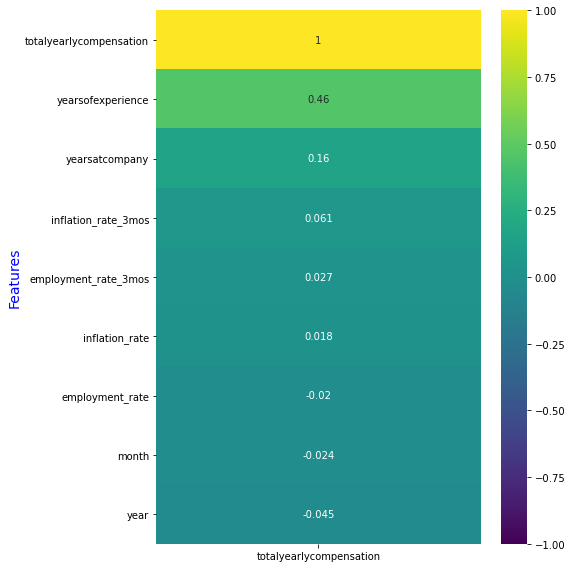

In [11]:
# Heatmap and Correlations 
figure = plt.figure(figsize=(8,8))
sns.heatmap(df.corr()[['totalyearlycompensation']].sort_values('totalyearlycompensation',ascending=False),annot=True, vmin = -1, vmax = 1, cmap='viridis', center=0)
plt.ylabel('Features', fontsize=14, color='blue')
plt.tight_layout()

# Exporting Figure
plt.savefig('../Images/features_vs_compensation.png');

#### Employee Locations

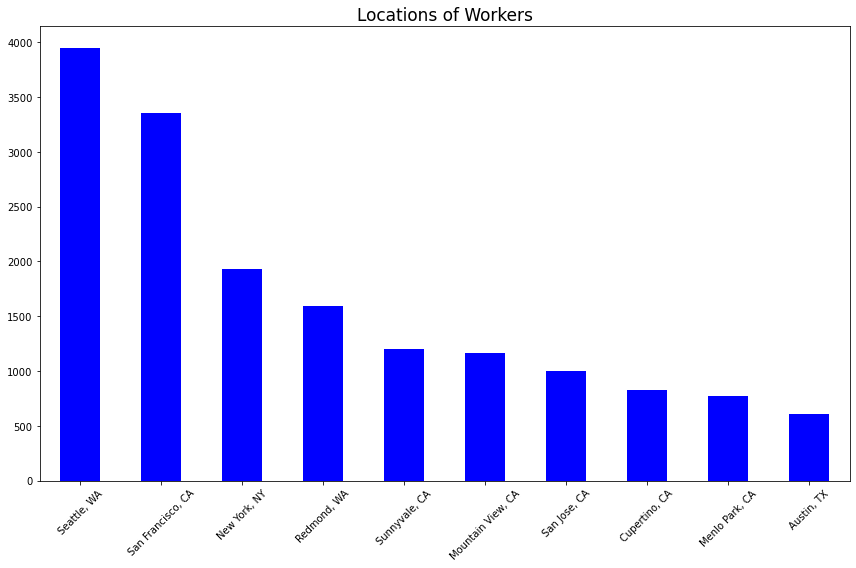

In [12]:
# Locations of Workers

plt.figure(figsize=(12,8))
df["location"].value_counts().iloc[:10].plot(kind="bar", color="blue")
plt.title("Locations of Workers", size=17)
plt.xticks(rotation=45)
plt.tight_layout()

# Exporting Figure
plt.savefig('../Images/worker_locations.png');

#### Total Compensation Top 10 by Title, Company, and State

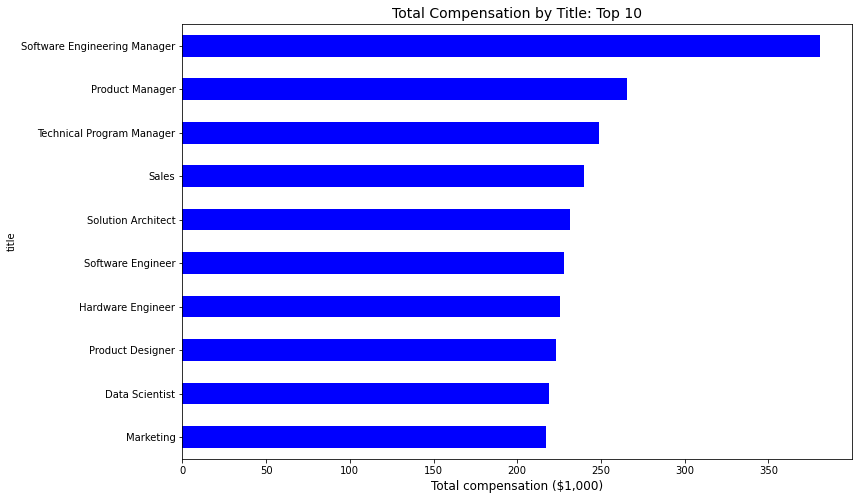

In [13]:
# Total Compensation by Title
plt.figure(figsize=(12,8))
df.groupby(['title'])['totalyearlycompensation'].mean().sort_values().tail(10).plot(kind='barh', color='blue')
plt.title('Total Compensation by Title: Top 10', fontsize=14)
plt.xlabel('Total compensation ($1,000)', fontsize=12)
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/total_compensation_by_title.png');

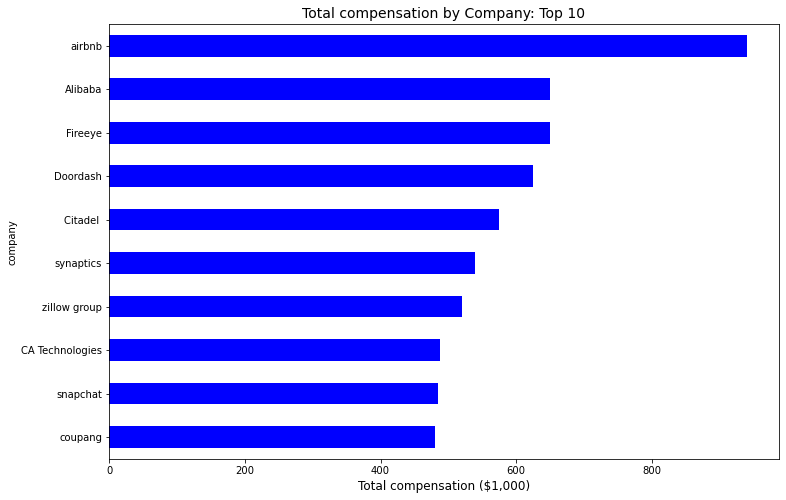

In [14]:
# Total Compensation by Company
plt.figure(figsize=(12,8))
df.groupby(['company'])['totalyearlycompensation'].mean().sort_values().tail(10).plot(kind='barh', color='blue')
plt.title('Total compensation by Company: Top 10', fontsize=14)
plt.xlabel('Total compensation ($1,000)', fontsize=12)
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/total_compensation_by_company_bar.png');

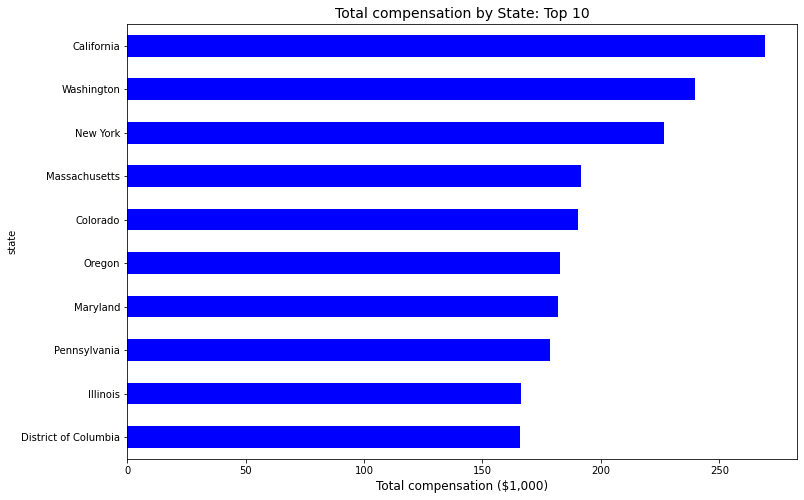

In [15]:
# Total Compensation by State
plt.figure(figsize=(12,8))
df.groupby(['state'])['totalyearlycompensation'].mean().sort_values().tail(10).plot(kind='barh', color='blue')
plt.title('Total compensation by State: Top 10', fontsize=14)
plt.xlabel('Total compensation ($1,000)', fontsize=12)
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/total_compensation_by_state.png');

#### Total Yearly Compensation

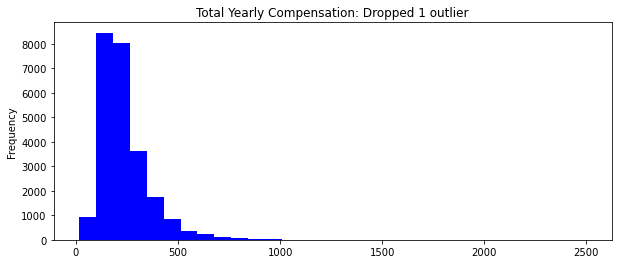

In [16]:
# Total Compensation without Outlier
plt.figure(figsize=(10,4))
df.loc[df['totalyearlycompensation'] < 4000, 'totalyearlycompensation'].plot(kind='hist', bins=30, color='blue')
plt.title('Total Yearly Compensation: Dropped 1 outlier')
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/total_compensation_without_outlier');

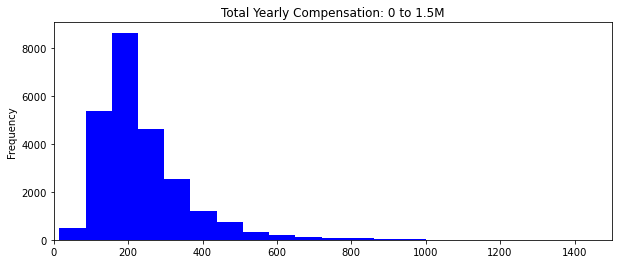

In [17]:
# Total Compensation from 0 to 1.5M
plt.figure(figsize=(10,4))
df['totalyearlycompensation'].plot(kind='hist', bins=70, xlim=(0,1500), color='blue')
plt.title('Total Yearly Compensation: 0 to 1.5M')
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/total_compensation_0_to_1.5m.png');

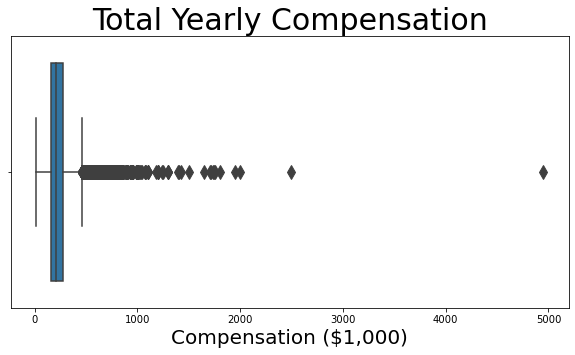

In [18]:
# Total Yearly Compensation - Boxplot
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['totalyearlycompensation'], fliersize = 10)
plt.title(label = 'Total Yearly Compensation', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Compensation ($1,000)', fontdict = {'size': 20}, loc = 'center')

# Exporting Figure
plt.savefig('../Images/total_compensation_boxplot.png');

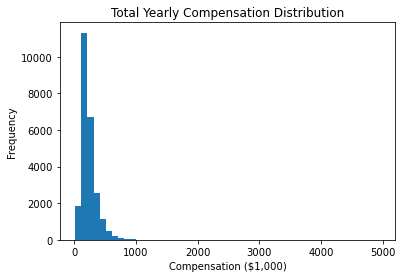

In [19]:
# Total Yearly Compensation Distribution
sp = (df['totalyearlycompensation'].plot(
        kind='hist',
        title='Total Yearly Compensation Distribution',
        bins = 50))

sp.set(xlabel = 'Compensation ($1,000)')
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/total_compensation_distribution.png');

#### Experience

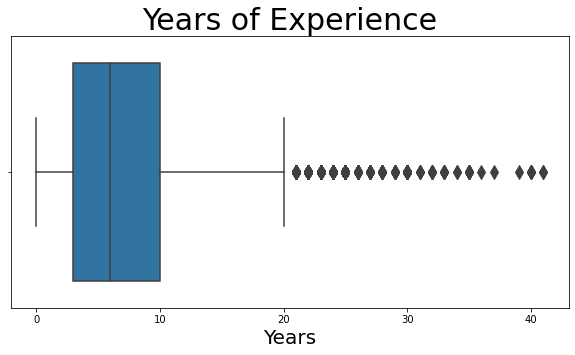

In [20]:
# Experience
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['yearsofexperience'], fliersize = 10)
plt.title(label = 'Years of Experience', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Years', fontdict = {'size': 20}, loc = 'center')
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/experience_years.png');

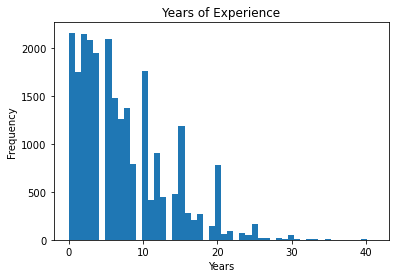

In [21]:
# Experience Histogram
sp = (df['yearsofexperience'].plot(
        kind='hist',
        title='Years of Experience',
        bins = 50))

sp.set(xlabel = 'Years')
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/experience_years_hist.png');

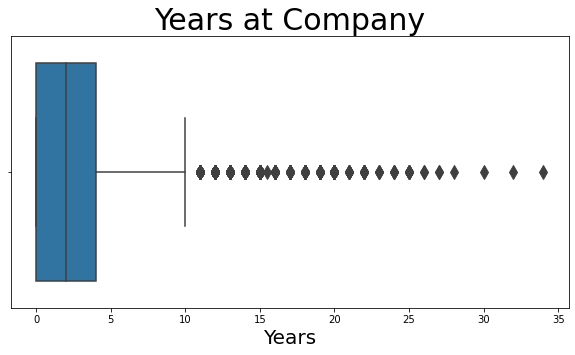

In [22]:
# Years at company
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['yearsatcompany'], fliersize = 10)
plt.title(label = 'Years at Company', fontdict = {'size': 30}, loc = 'center')
plt.xlabel('Years', fontdict = {'size': 20}, loc = 'center')
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/years_at_company.png');

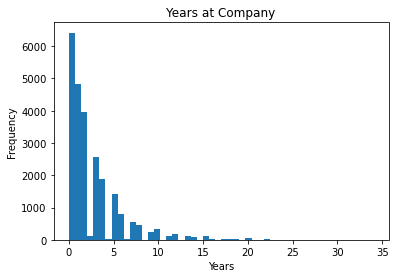

In [23]:
# Years at company histogram
sp = (df['yearsatcompany'].plot(
        kind='hist',
        title='Years at Company',
        bins = 50))

sp.set(xlabel = 'Years')
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/years_at_company_hist.png');

#### Compensation vs. Experience

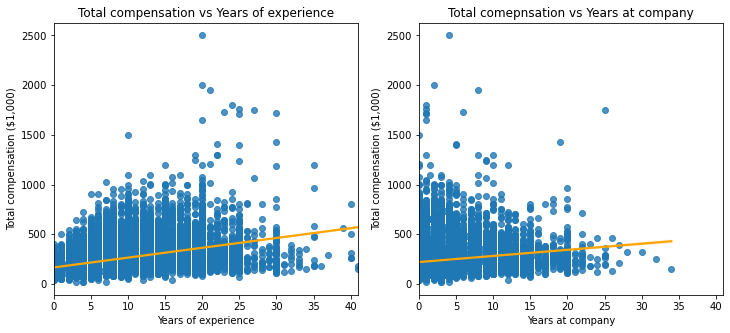

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True)

ax1 = sns.regplot(data=df.loc[df['totalyearlycompensation'] < 4000, :], 
                  x='yearsofexperience', 
                  y='totalyearlycompensation', 
                  line_kws={'color':'orange'},
                  ax=axes[0])
ax1.set_title('Total compensation vs Years of experience')
ax1.set_xlabel('Years of experience')
ax1.set_ylabel('Total compensation ($1,000)')

ax2 = sns.regplot(data=df.loc[df['totalyearlycompensation'] < 4000, :], 
                  x='yearsatcompany', 
                  y='totalyearlycompensation', 
                  line_kws={'color':'orange'},
                  ax=axes[1])

ax2.set_title('Total comepnsation vs Years at company')
ax2.set_xlabel('Years at company')
ax2.set_ylabel('Total compensation ($1,000)')
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/compensation_years.png');

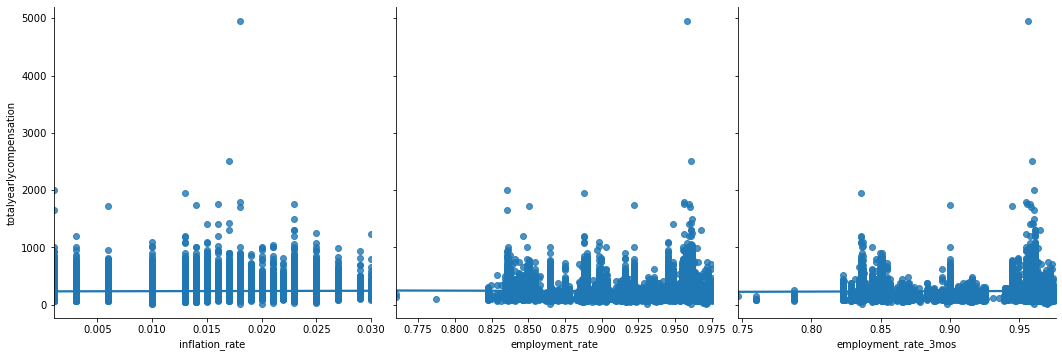

In [25]:
#Creating a pairplot with regression line for more visual aid
sns.pairplot(data=df, x_vars=['inflation_rate', 'employment_rate', 'employment_rate_3mos'],
             y_vars=['totalyearlycompensation'],
             kind='reg', height=5, aspect=1)
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/reg_plots.png');

#### Employment Rate

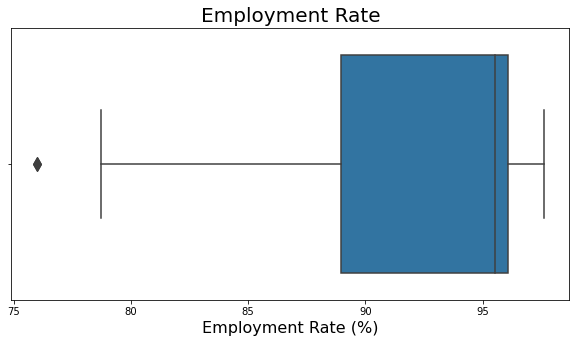

In [26]:
# Employment Rate Boxplot
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
sns.boxplot(df['employment_rate']*100, fliersize = 10)
plt.title(label = 'Employment Rate', fontdict = {'size': 20}, loc = 'center')
plt.xlabel('Employment Rate (%)', fontdict = {'size': 16}, loc = 'center')
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/employment_rate_boxplot.png');

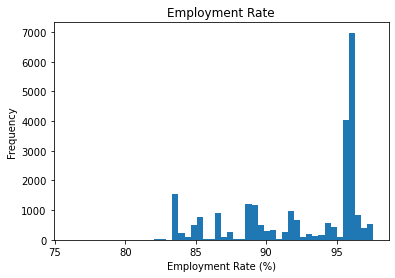

In [27]:
# Employment Rate Histogram
empr = df['employment_rate']*100
sp = (empr.plot(
        kind='hist',
        title='Employment Rate',
        bins = 50))

sp.set(xlabel = 'Employment Rate (%)')
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/employment_rate_hist.png');

#### Compensation Records

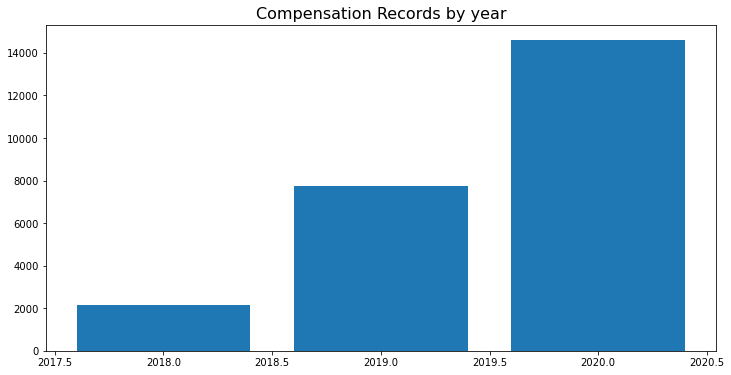

In [28]:
# Using the matplotlib bar function and methods

# Set the figure size
plt.figure(figsize=(12, 6))

# Make the plot
plt.bar(df['year'].value_counts().index,
        df['year'].value_counts())
plt.title('Compensation Records by year', fontsize=16)
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/compensation_records_distribution.png');

#### Unique Title and Levels

In [29]:
# Title and Levels: df.groupby('title')['level'].unique()
# Count of unique levels: [len(i) for i in df.groupby('title')['level'].unique()]

In [30]:
df.groupby('title')['level'].unique()

title
Business Analyst                [L4, 62, L1, L5, T5, 10, L3, L6, Senior, Level...
Data Scientist                  [Senior, 64, Staff, T6, L5, 65, L6, II, Sr UX ...
Hardware Engineer               [ICT4, L2, icb6-master, ICT3, Senior Staff Eng...
Human Resources                 [Band 10, 63, 28, 22, IC5, L1, Manager, Analys...
Management Consultant           [Analyst, Manager, Business Technology Analyst...
Marketing                       [65, Director, Senior Manager, IC7, level 6, L...
Mechanical Engineer             [6, Senior, L2, V, Senior Engineer, G06, L6, G...
Product Designer                [64, Staff SWE, IC3, User experience designer,...
Product Manager                 [63, 7, Software Engineer 4, 6, L07, IC4, 68, ...
Recruiter                       [IC4, IC5, Support, Recruiter 2, L4, L6, L2, G...
Sales                           [Vice President, L6, 64, Sales Leader, Senior,...
Software Engineer               [IC2, E3, Senior MTS, L4, Master Software Engi...
Software E

In [31]:
level_count = [len(i) for i in df.groupby('title')['level'].unique()]
df_title = df.groupby('title')['level'].unique().to_frame()

df_title_count = pd.DataFrame(level_count, columns=['Level Count'], index=df_title.index)
df_title_count

,Level Count
title,
Business Analyst,77
Data Scientist,230
Hardware Engineer,180
Human Resources,38
Management Consultant,85
Marketing,93
Mechanical Engineer,60
Product Designer,183
Product Manager,329


#### Inflation Rate

In [32]:
df_inf_rate = pd.read_csv('../Data/inflation_monthly_cleaned.csv')
df_inf_rate.sort_values(by=['year_month'], ascending=True, inplace=True)
df_inf_rate['Inflation_Rate_percentage'] = df_inf_rate['inflation_rate']*100

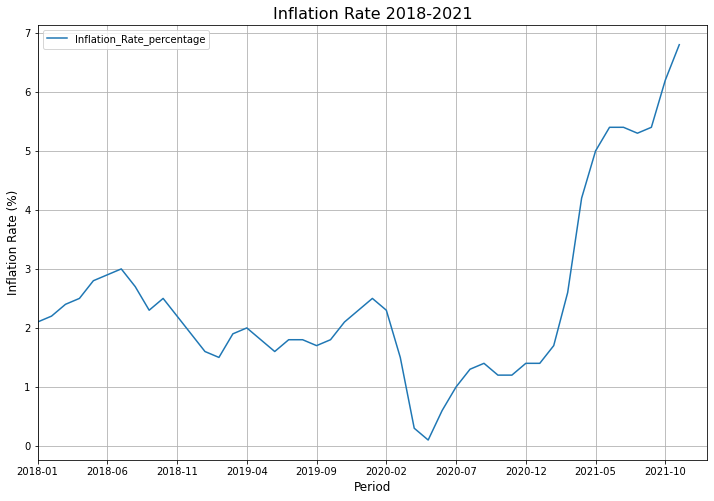

In [33]:
ax = df_inf_rate.plot(x='year_month', y='Inflation_Rate_percentage', grid=True, xlim=4,
                 figsize=(12,8), fontsize=10)
ax.set_title('Inflation Rate 2018-2021', fontsize=16)
ax.set_xlabel('Period', fontsize=12)
ax.set_ylabel('Inflation Rate (%)', fontsize=12)
ax.set_xlim(xmin=0, xmax=48, auto=False)
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/inflation_rate.png');

#### Unemployment Rate


In [34]:
df_unemp_rate = pd.read_csv('../Data/unemp_cleaned_AW.csv')
df_unemp_rate.sort_values(by=['year_month'], ascending=True, inplace=True)
# 2018 to 2021: df_unemp_rate[840:887]

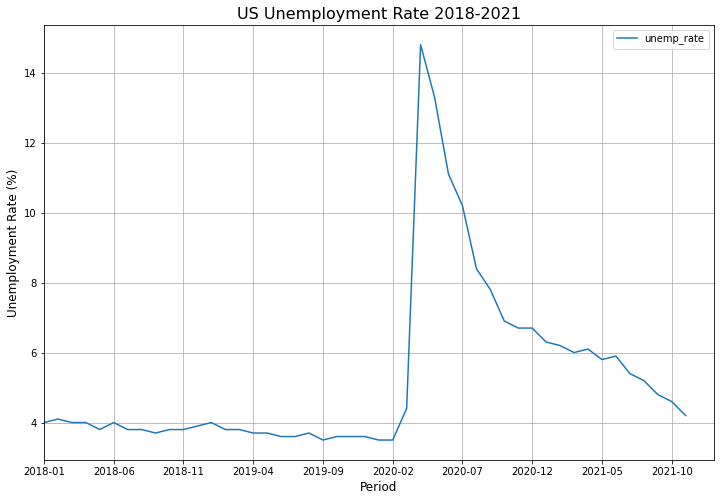

In [35]:
ax = df_unemp_rate[840:887].plot(x='year_month', y='unemp_rate', grid=True, xlim=4,
                 figsize=(12,8), fontsize=10)
ax.set_title('US Unemployment Rate 2018-2021', fontsize=16)
ax.set_xlabel('Period', fontsize=12)
ax.set_ylabel('Unemployment Rate (%)', fontsize=12)
ax.set_xlim(xmin=0, xmax=48, auto=False)
plt.tight_layout

# Exporting Figure
plt.savefig('../Images/us_unemployment_rate.png');

### Observations

1. Total yearly compensation is mostly correlated with years of experience followed by years at the company.
2. Total yearly compensation seems more related to inflation and employment rates 3 months ago than the current months, though the corelations are all very small, probably not statistical significant.